# Task 1


### Action I

In [1]:
import yfinance as yf

ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")
print(df.head())

                                 Open        High         Low       Close  \
Date                                                                        
2020-09-14 00:00:00-04:00  111.590169  112.767156  109.722553  112.212708   
2020-09-15 00:00:00-04:00  115.101701  115.588060  110.510472  112.387817   
2020-09-16 00:00:00-04:00  112.086278  112.835267  108.983306  109.070847   
2020-09-17 00:00:00-04:00  106.726601  109.138937  105.744154  107.329681   
2020-09-18 00:00:00-04:00  107.388044  107.854944  103.195625  103.925163   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-09-14 00:00:00-04:00  140150100        0.0           0.0  
2020-09-15 00:00:00-04:00  184642000        0.0           0.0  
2020-09-16 00:00:00-04:00  154679000        0.0           0.0  
2020-09-17 00:00:00-04:00  178011000        0.0           0.0  
2020-09-18 00:00:00-04:00  287104900        0.0           0.0  


#### Column Explanations

Date (index) – Trading day.\
Open – Price when the stock first traded that day.\
High – Highest price during that day.\
Low – Lowest price during that day.\
Close – Price at the end of the trading day (this is our target y).\
Volume – Number of shares traded that day.\
Dividends – Dividend issued per share on that day (if any).\
Stock Splits – Stock split ratio (if a split occurred that day).

#### Choosing Features (X) to Predict Close 
Since the goal is to predict Close, we need predictors that make sense: \
Good candidates for Features (X): \
Open → starting price of the day (strongly related to Close). \
High → daily max, often correlated with closing price. \
Low → daily min, also correlated. \
Volume → market activity, might influence price movement. \
Not ideal for prediction in this assignment: \
Dividends (rare events, mostly 0). \
Stock Splits (rare events, mostly 0). 

In [2]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

### Action II

In [3]:
import yfinance as yf
import pandas as pd

# Get stock data
ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")

# Define Features (X) and Target (y)
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Write features to console
print("Features (X) sample:")
print(X.head())
print("\nTarget (y) sample:")
print(y.head())


Features (X) sample:
                                 Open        High         Low     Volume
Date                                                                    
2020-09-14 00:00:00-04:00  111.590169  112.767156  109.722553  140150100
2020-09-15 00:00:00-04:00  115.101701  115.588060  110.510472  184642000
2020-09-16 00:00:00-04:00  112.086278  112.835267  108.983306  154679000
2020-09-17 00:00:00-04:00  106.726601  109.138937  105.744154  178011000
2020-09-18 00:00:00-04:00  107.388044  107.854944  103.195625  287104900

Target (y) sample:
Date
2020-09-14 00:00:00-04:00    112.212708
2020-09-15 00:00:00-04:00    112.387817
2020-09-16 00:00:00-04:00    109.070847
2020-09-17 00:00:00-04:00    107.329681
2020-09-18 00:00:00-04:00    103.925163
Name: Close, dtype: float64


#### Action III

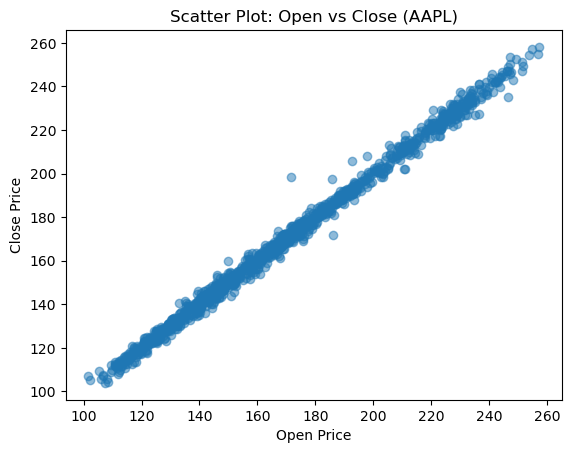

In [4]:
import matplotlib.pyplot as plt

# Plot open and close values
plt.scatter(df["Open"], df["Close"], alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Scatter Plot: Open vs Close (AAPL)")
plt.show()

#### Action IV

In [5]:
# Combine X and y into one DataFrame for correlation
corr = df[["Open", "High", "Low", "Volume", "Close"]].corr()

print("Correlation matrix:")
print(corr["Close"])

Correlation matrix:
Open      0.997557
High      0.998926
Low       0.998863
Volume   -0.525277
Close     1.000000
Name: Close, dtype: float64


Open → Close: Very strong positive correlation (~0.99). \
High → Close: Very strong positive correlation (~0.99). \
Low → Close: Very strong positive correlation (~0.99). \
Volume → Close: Negative correlation (-0.531181).

This suggests that higher trading activity sometimes coincides with price dropping.

#### Action V

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Split dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print to console
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (879, 4)
Testing data shape: (377, 4)


#### Action VI

In [8]:
from sklearn.linear_model import LinearRegression

# multivariate linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Action VII

In [9]:
# Display intercept and coefficients

print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2, ...):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

Intercept (b0): 0.09345311901270748
Coefficients (b1, b2, ...):
  Open: -0.6287728678710371
  High: 0.765265131788863
  Low: 0.8643782739036364
  Volume: -6.436246315095618e-10


#### Action VIII

In [10]:
from sklearn.metrics import r2_score

# R^2 scores
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("R^2 Score (Training):", train_r2)
print("R^2 Score (Testing):", test_r2)

R^2 Score (Training): 0.9992092538914582
R^2 Score (Testing): 0.9990171533201804


#### Action IX

In [11]:
import numpy as np

# Example imaginary feature sets (Open, High, Low, Volume)
imaginary_data = np.array([
    [150, 155, 149, 50000000],
    [200, 205, 195, 70000000],
    [300, 310, 290, 100000000]
])

predictions = model.predict(imaginary_data)
print("predicted imaginary close values:")
for i, pred in enumerate(predictions):
    print(f"  Input {i+1}: {pred}")

predicted imaginary close values:
  Input 1: 153.15379994569727
  Input 2: 199.72694124852563
  Input 3: 299.2991205811527


c:\Users\young\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Action X

In [12]:
# refit with intercept as false
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X_train, y_train)

print("Coefficients with no intercept:")
for feature, coef in zip(X.columns, model_no_intercept.coef_):
    print(f"  {feature}: {coef}")

Coefficients with no intercept:
  Open: -0.6289061487855503
  High: 0.7625795753248451
  Low: 0.8676140450067813
  Volume: -2.161478819438969e-10
